# MIC（Maximal Information Coefficient）

[Reshef, et al. (2011). Detecting novel associations in large data sets.](https://www.science.org/doi/10.1126/science.1205438) で提案されたMIC（Maximal Information Coefficient）は、相互情報量を用いてデータの非線形な関連性を評価できる係数。

「21世紀の相関係数（[A Correlation for the 21st Century](https://www.science.org/doi/10.1126/science.1215894)）」としてScience誌に紹介され、話題になった。

## 相互情報量（Mutual Information; MI）

確率分布 $p(x,y)$ による一般の非線形依存関係の強さを測る。

### 定義式

離散確率変数の場合：

$$
I(X ; Y)=\sum_{y \in \mathcal{Y}} \sum_{x \in \mathcal{X}} p(x, y) \log \frac{p(x, y)}{p(x) p(y)}
$$

連続確率変数の場合：


$$
I(X ; Y)=\int_{\mathcal{Y}} \int_{\mathcal{X}} p(x, y) \log \frac{p(x, y)}{p(x) p(y)} d x d y
$$

### 特徴
- $I(X;Y)=0$ なら **独立**  
- 線形・非線形を問わずあらゆる依存を検出  
- ただし値域が固定されておらず、相関係数のように簡単には解釈できない  
- 推定には KDE, kNN などが必要


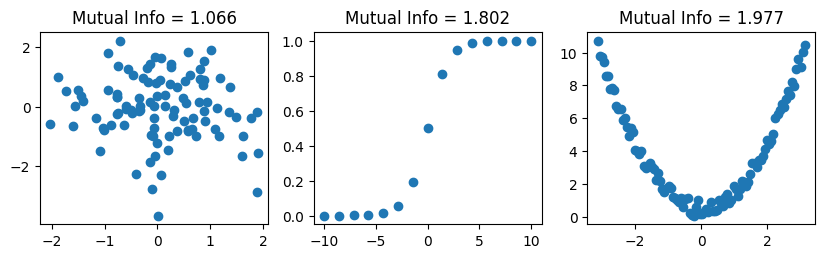

In [10]:
import numpy as np
from sklearn.metrics import mutual_info_score # 離散型確率変数の相互情報量

def discretized_mi(x, y, bins=20):
    # 連続変数を離散化して簡易的に相互情報量を求める
    # x, y を bins 個の等幅ビンに離散化
    x_binned = np.digitize(x, np.histogram_bin_edges(x, bins=bins))
    y_binned = np.digitize(y, np.histogram_bin_edges(y, bins=bins))
    
    # 離散化した値で MI を計算
    return mutual_info_score(x_binned, y_binned)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=[10, 2.5], ncols=3)

true_r = 0
mu = np.array([0.0, 0.0])
Sigma = np.array([[1.0, true_r], [true_r, 1.0]])
samples = np.random.multivariate_normal(mu, Sigma, size=100)
x = samples[:, 0]
y = samples[:, 1]
axes[0].scatter(x, y)
axes[0].set_title(f"Mutual Info = {discretized_mi(x, y):.3f}")

x = np.linspace(-10, 10, 15)
y = 1 / (1 + np.exp(-x))
axes[1].scatter(x, y)
axes[1].set_title(f"Mutual Info = {discretized_mi(x, y):.3f}")

x = np.linspace(-3.14,3.14, 100)
y = x**2 + np.random.random(len(x))
axes[2].scatter(x, y)
axes[2].set_title(f"Mutual Info = {discretized_mi(x, y):.3f}")

%matplotlib inline

## MIC（Maximal Information Coefficient）

### 概念的な定義

散布図をさまざまな格子分割 $(x,y)$ に切り、各ビンの相対頻度から **相互情報量** を計算し、その最大値をスケール正規化したもの。

MIC は相互情報量を複数グリッドで最大化し、

$$
0 \le \mathrm{MIC} \le 1
$$  

となるように正規化した指標。

### 特徴
- 単調・非単調のどちらも検出  
- 関係の形状が分からない探索フェーズに強い  
- 計算はやや重いが実務では十分使える

## 参考

- [Reshef et al., (2011). Detecting novel associations in large data sets. science, 334(6062), 1518-1524.](https://www.science.org/doi/10.1126/science.1205438)
- [Speed, T. (2011). A correlation for the 21st century. Science, 334(6062), 1502-1503.](https://www.science.org/doi/10.1126/science.1215894)
